# CPSC 330 - Applied Machine Learning 

## Homework 5: Evaluation metrics
### Associated lectures: [Lectures 9, 10](https://ubc-cs.github.io/cpsc330/README.html) 

**Due date: Wednesday, ~~Oct 25, 2021 at 11:59pm~~ Oct 27, 2021 at 11:59pm**

## Imports

In [78]:
import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
import mglearn
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

## Instructions 
<hr>
rubric={points:3}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330/blob/master/docs/homework_instructions.md). 

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

<br><br>

## Exercise 1: Precision, recall, and f1 score by hand <a name="1"></a>
<hr>

Consider the problem of predicting whether a patient has a disease or not. Below are confusion matrices of two machine learning models: Model A and Model B. 

- Model A

|    Actual/Predicted      | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | 2 | 8 |
| **Actual no disease**       | 0 | 100 |


- Model B

|    Actual/Predicted      | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | 6 | 4 |
| **Actual no disease**       | 10 | 90 |

### 1.1 Positive vs. negative class 
rubric={points:2}

**Your tasks:**

Precision, recall, and f1 score depend upon which class is considered "positive", that is the thing you wish to find. In the example above, which class is likely to be the "positive" class? Why? 

The "positive" class is likely to be those **with** the disease. In this example, those with the disease represents the class of interest, since we are most likely more concerned with determining who *does* have the disease, over who *doesn't*.

<br><br>

### 1.2 Accuracy
rubric={points:2}

**Your tasks:**

Calculate accuracies for Model A and Model B. 

We'll store all metrics associated with Model A and Model B in the `results_dict` below. 

In [6]:
results_dict = {"A": {}, "B": {}}

In [24]:
results_dict["A"]["TP"] = 2
results_dict["A"]["FP"] = 0
results_dict["A"]["TN"] = 100
results_dict["A"]["FN"] = 8
results_dict["A"]["n_observations"] = results_dict["A"]["TP"] + results_dict["A"]["FP"] + results_dict["A"]["TN"] + results_dict["A"]["FN"]

results_dict["B"]["TP"] = 6
results_dict["B"]["FP"] = 10
results_dict["B"]["TN"] = 90
results_dict["B"]["FN"] = 4
results_dict["B"]["n_observations"] = results_dict["B"]["TP"] + results_dict["B"]["FP"] + results_dict["B"]["TN"] + results_dict["B"]["FN"]


results_dict["A"]["accuracy"] = (results_dict["A"]["TP"] + results_dict["A"]["TN"])/results_dict["A"]["n_observations"]
results_dict["B"]["accuracy"] = (results_dict["B"]["TP"] + results_dict["B"]["TN"])/results_dict["B"]["n_observations"]



In [25]:
assert tests_hw5.ex1_2_1(
    results_dict["A"]["accuracy"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [26]:
assert tests_hw5.ex1_2_2(
    results_dict["B"]["accuracy"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [27]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.927273,0.872727
TP,2.000000,6.000000
FP,0.000000,10.000000
TN,100.000000,90.000000
FN,8.000000,4.000000
n_observations,110.000000,110.000000


<br><br>

### 1.3 Which model would you pick? 
rubric={points:1}

**Your tasks:**

Which model would you pick simply based on the accuracy metric? 

Simply based on the accuracy metric, I would select model A with the higher accuracy score. However, there is further analysis that needs to be done before determining if this is the optimal model.

<br><br>

### 1.4 Precision, recall, f1-score
rubric={points:6}

**Your tasks:**

1. Calculate precision, recall, f1-score for Model A and Model B manually, without using `scikit-learn` tools. 


In [29]:
results_dict["A"]["precision"] = results_dict["A"]["TP"]/(results_dict["A"]["TP"] + results_dict["A"]["FP"])
results_dict["B"]["precision"] = results_dict["B"]["TP"]/(results_dict["B"]["TP"] + results_dict["B"]["FP"])

results_dict["A"]["recall"] = results_dict["A"]["TP"]/(results_dict["A"]["TP"] + results_dict["A"]["FN"])
results_dict["B"]["recall"] = results_dict["B"]["TP"]/(results_dict["B"]["TP"] + results_dict["B"]["FN"])

results_dict["A"]["f1"] = 2*(results_dict["A"]["precision"]*results_dict["A"]["recall"])/(results_dict["A"]["precision"] + results_dict["A"]["recall"])
results_dict["B"]["f1"] = 2*(results_dict["B"]["precision"]*results_dict["B"]["recall"])/(results_dict["B"]["precision"] + results_dict["B"]["recall"])

In [30]:
assert tests_hw5.ex1_4_1(
    results_dict["A"]["precision"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [31]:
assert tests_hw5.ex1_4_2(
    results_dict["B"]["precision"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [32]:
assert tests_hw5.ex1_4_3(
    results_dict["A"]["recall"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [33]:
assert tests_hw5.ex1_4_4(
    results_dict["B"]["recall"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [34]:
assert tests_hw5.ex1_4_5(
    results_dict["A"]["f1"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [35]:
assert tests_hw5.ex1_4_6(
    results_dict["B"]["f1"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


Show the dataframe with all results. 

In [36]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.927273,0.872727
TP,2.000000,6.000000
FP,0.000000,10.000000
TN,100.000000,90.000000
FN,8.000000,4.000000
n_observations,110.000000,110.000000
precision,1.000000,0.375000
recall,0.200000,0.600000
f1,0.333333,0.461538


<br><br>

### 1.5 Discussion
rubric={points:4}

**Your tasks:**
1. Which metric is more informative in this problem? Why? 
2. Which model would you pick based on this information? 

1.

In this problem, I would consider model **recall** to be more informative than model **accuracy**. This is because our observations are imbalanced since there are many more true negative cases than true positive cases. Therefore, the accuracy of even a dummy classifier would be very high. But this is misleading, since the metric we really care about is how often it is able to correctly classify a positive disease case - in other words recall. 

Additionally, for medical diagnosis I would consider false negatives to be more harmful than false positives, so **precision** is not as important to us as **recall** is.

2.

With this in mind, I would select the model with the highest recall - model B.

<br><br>

### (Optional) 1.6 
rubric={points:1}

**Your tasks:**

Provide 4 to 5 example classification datasets (with links) where accuracy metric would be misleading. Discuss which evaluation metric would be more appropriate for each dataset. You may consider datasets we have used in this course so far. You could also look up datasets on Kaggle. 

1. Credit Card Fraud Dataset: https://www.kaggle.com/mlg-ulb/creditcardfraud
    - There are many more examples of "no fraud" than their are of "yes fraud", therefore a dummy classifier would produce very high accuracy simply by guessing "no fraud" on all examples.
    - Here, we would care more about our ability to detect fraud, when there actually is fraud - so we would choose **recall** as our evaluation metric.

2. SMS Spam Dataset: https://www.kaggle.com/uciml/sms-spam-collection-dataset
    - There is class imbalance with 87% of entries being "not spam", and only 13% of entries being "spam".
    - In this instance we care more about being accurate with our predictions, rather than being able to catch *all* instances of spam. As such, **precision** would be our evaluation metric of choice.

3. Australia Rainfall Dataset: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package
    - Measures "did it rain, or not?"
    - 76% of days saw no rain, so there is class imbalance present - once again this will produce misleading accuracy values.
    - In this example, there is no clear "more harmful" prediction. Therefore, I would consider precision and recall as important here and choose F1 score as the best evaluation metric.

4. Real/Fake Job Posting Dataset: https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction
    - 18k job descriptions, of which only 800 are fake - so there are many more real job postings in the dataset
    - Here, it is a bit of a subjective opinion, but I would aire on the side of saying that it is more harmful to not identify a fake job posting and have an applicant share personal information, than to accidentally classify a real job as fake. With that in mind, I would care more about maximizing the **recall** as our evaluation metric.

<br><br><br><br>

### Exercise 2: Classification evaluation metrics using `sklearn` <a name="2"></a>
<hr>

In general, when a dataset is imbalanced, accuracy does not provide the whole story. In class, we looked at credit card fraud dataset which is a classic example of an imbalanced dataset. 

Another example is customer churn datasets. [Customer churn](https://en.wikipedia.org/wiki/Customer_attrition) refers to the notion of customers leaving a subscription service like Netflix. In this exercise, we will try to predict customer churn in a dataset where most of the customers stay with the service and a small minority cancel their subscription. To start, please download the [Kaggle telecom customer churn dataset](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). Once you have the data, you should be able to run the following code:

The starter code below reads the data CSV as a pandas dataframe and splits it into 70% train and 30% test. 

Note that `churn` column in the dataset is the target. "True" means the customer left the subscription (churned) and "False" means they stayed.

> Note that for this kind of problem a more appropriate technique is something called survival analysis and we'll be talking about it later in the course. For now, we'll just treat it as a binary classification problem. 

In [38]:
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv", encoding="utf-8")
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)
train_df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1402,NE,70,415,421-8535,no,no,0,213.4,86,36.28,...,77,17.40,256.6,101,11.55,5.7,4,1.54,1,False
1855,WI,67,510,417-2265,no,no,0,109.1,134,18.55,...,76,12.10,91.2,86,4.10,10.9,5,2.94,2,False
633,NJ,122,415,327-9341,no,yes,34,146.4,104,24.89,...,103,7.62,220.0,91,9.90,15.6,4,4.21,2,False
1483,NV,107,510,419-9688,yes,no,0,234.1,91,39.80,...,105,13.86,282.5,100,12.71,10.0,3,2.70,1,False
2638,HI,105,510,364-8128,no,no,0,125.4,116,21.32,...,95,22.23,241.6,104,10.87,11.4,9,3.08,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,WY,126,408,339-9798,yes,no,0,197.6,126,33.59,...,112,20.95,285.3,104,12.84,12.5,8,3.38,2,False
3089,WV,70,510,348-3777,no,yes,30,143.4,72,24.38,...,92,14.45,127.9,68,5.76,9.4,4,2.54,3,False
1766,NJ,125,415,406-6400,no,no,0,182.3,64,30.99,...,121,11.88,171.6,96,7.72,11.6,7,3.13,2,False
1122,NE,159,415,362-5111,no,no,0,189.1,105,32.15,...,147,20.92,242.0,106,10.89,10.4,5,2.81,1,True


<br><br>

### 2.1 Distribution of target values
rubric={points:4}

**Your tasks:**

Examine the distribution of target values in the train split. Do you see class imbalance? If yes, do we need to deal with it? Why or why not? 

In [40]:
false_proportion = train_df.query("churn == False").shape[0]/train_df.shape[0]
print("False Proportion: %.4f" % false_proportion)
print("True Proportion: %.4f" % (1-false_proportion))

False Proportion: 0.8504
True Proportion: 0.1496


Yes, there is a clear imbalance between positive/negative classes. And yes, we should probably deal with this or take note of this imbalance moving forward. If we blindy listen to model accuracy, our results will be misleading since even a dummy classifier could get 85% accuracy.

In this example, we probably care more about our ability to find as many customers who are likely to churn as possible (recall), and dont necessarily care as much about the accuracy with which we do it (precision).

<br><br>

### (Optional) 2.2 EDA 
rubric={points:1}

**Your tasks:**

Come up with **two** exploratory questions you would like to answer and explore those. Briefly discuss your results in 1-3 sentences.

You are welcome to use `pandas_profiling` (see Lecture 10) but you don't have to.

1. Are there any classes that we will not want to include in our analysis? Should area code be included?
2. For which groups of features will we need to worry about null values (e.g. imputation)?

In [41]:
train_df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000
mean,100.434634,436.324046,8.028290,179.655679,100.567081,30.542015,201.175782,99.885555,17.100210,201.211745,99.988856,9.054591,10.269567,4.503215,2.773365,1.551650
std,39.642470,41.854200,13.665229,54.546284,20.202414,9.272847,50.449386,19.788878,4.288194,50.888058,19.406455,2.290012,2.777601,2.507555,0.749929,1.328702
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.400000,87.000000,24.380000,167.300000,87.000000,14.220000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.200000,101.000000,30.460000,202.400000,100.000000,17.200000,201.600000,100.000000,9.070000,10.400000,4.000000,2.810000,1.000000
75%,127.000000,415.000000,19.000000,216.300000,114.000000,36.770000,236.000000,113.000000,20.060000,236.600000,113.000000,10.650000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,354.200000,168.000000,30.110000,377.500000,164.000000,16.990000,20.000000,20.000000,5.400000,9.000000


In [42]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 1402 to 1346
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   2333 non-null   object 
 1   account length          2333 non-null   int64  
 2   area code               2333 non-null   int64  
 3   phone number            2333 non-null   object 
 4   international plan      2333 non-null   object 
 5   voice mail plan         2333 non-null   object 
 6   number vmail messages   2333 non-null   int64  
 7   total day minutes       2333 non-null   float64
 8   total day calls         2333 non-null   int64  
 9   total day charge        2333 non-null   float64
 10  total eve minutes       2333 non-null   float64
 11  total eve calls         2333 non-null   int64  
 12  total eve charge        2333 non-null   float64
 13  total night minutes     2333 non-null   float64
 14  total night calls       2333 non-null

In [47]:
# Find the number of distinct area codes
unique_codes = train_df["area code"].unique()
print("Number of unique codes: %i" % unique_codes.shape[0])
print(unique_codes)

Number of unique codes: 3
[415 510 408]


We can see quite clearly that we will not want to include phone number as a category, since there will all be unique values. Additionally, since there are only 3 distinct area codes, we will include this as a categorical variable. Finally, since all entries are non-null, we do not have to worry about missing values.

<br><br>

### 2.3 Column transformer 
rubric={points:10}

The code below creates `X_train`, `y_train`, `X_test`, `y_test` for you. 
In preparation for building a classifier, set up a `ColumnTransformer` that performs whatever feature transformations you deem sensible. This can include dropping features if you think they are not helpful. Remember that by default `ColumnTransformer` will drop any columns that aren't accounted for when it's created.

In each case, briefly explain your rationale with 1-2 sentences. You do not need an explanation for every feature, but for every group of features that are being transformed the same way. For example, "I am doing transformation X to the following categorical features: `a`, `b`, `c` because of reason Y," etc.

In [48]:
print(train_df.columns)

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


In [52]:
X_train = train_df.drop(columns=["churn"])
X_test = test_df.drop(columns=["churn"])

y_train = train_df["churn"]
y_test = test_df["churn"]

# Define feature categories
numeric_features = ["account length",
                    "number vmail messages", 
                    "total day minutes", 
                    "total day calls", 
                    "total day charge",
                    "total eve minutes", 
                    "total eve calls", 
                    "total eve charge", 
                    "total night minutes", 
                    "total night calls", 
                    "total night charge", 
                    "total intl minutes", 
                    "total intl calls", 
                    "total intl charge", 
                    "customer service calls"]

binary_features = ["international plan","voice mail plan"]
drop_features = ["phone number"]
categorical_features = ["state", "area code"]

# Create column transformer
# The following code is adapted from course notes, lecture 6
preprocessor = make_column_transformer(
    (
        StandardScaler(),
        numeric_features,
    ),  # scaling on numeric features
    (
        OneHotEncoder(sparse=False, handle_unknown="ignore"),
        categorical_features,
    ),  # OHE on categorical features
    (
        OneHotEncoder(drop="if_binary", dtype=int),
        binary_features,
    ),  # binary features
    ("drop", drop_features), # no transformations on the binary features
)

All of the numeric features (most of the features), are simply transformed by applying a standard scaling to them to make sure that each feature is given equivalent weightings.

Both *international plan* and *voice mail plan* are either Yes or No. Thus, we can just use a binary representation.

Finally, both *state* and *area code* have multiple categories associated with them, and therefore we will use One Hot Encoding to represent these features.

<br><br>

### 2.4 Visualizing the transformed data 
rubric={points:4}

Fit and transform your `ColumnTransformer` on your training set. Print the first 5 rows of the transformed data as a dataframe (not numpy array). See lecture 10 for code that can get you the new column names after transforming. 

In [53]:
preprocessor.fit(X_train)
preprocessor.named_transformers_

{'standardscaler': StandardScaler(),
 'onehotencoder-1': OneHotEncoder(handle_unknown='ignore', sparse=False),
 'onehotencoder-2': OneHotEncoder(drop='if_binary', dtype=<class 'int'>),
 'drop': 'drop'}

In [56]:
# Following code adapted from Lecture 10 class notes
ohe_columns = list(
    preprocessor.named_transformers_["onehotencoder-1"].get_feature_names(categorical_features)
)

new_columns = numeric_features + ohe_columns + binary_features

X_train_enc = pd.DataFrame(
    preprocessor.transform(X_train), index=X_train.index, columns=new_columns
)
X_train_enc.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_VT,state_WA,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510,international plan,voice mail plan
1402,-0.767893,-0.587624,0.618769,-0.721211,0.618927,0.069871,-1.156734,0.069926,1.088667,0.052115,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1855,-0.843585,-0.587624,-1.293778,1.655252,-1.293517,-1.167277,-1.207278,-1.166291,-2.162302,-0.720990,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
633,0.544113,1.900976,-0.609809,0.169963,-0.609654,-2.210130,0.157417,-2.211244,0.369287,-0.463288,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1483,0.165650,-0.587624,0.998345,-0.473663,0.998611,-0.754894,0.258506,-0.755774,1.597736,0.000574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2638,0.115188,-0.587624,-0.994886,0.764078,-0.994731,1.195994,-0.246937,1.196515,0.793839,0.206736,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<br><br>

### 2.5 area code feature
rubric={points:4}

The original dataset had a feature called `area code`. Let's assume we encoded this feature with one-hot encoding.

1. The area codes were numbers to begin with. Why do we want to use one-hot encoding on this feature?
2. What were the possible values of `area code`? 
3. What new feature(s) were created to replace `area code`? 

1. We want to use One Hot Encoding because there are certain categories of area codes that phone numbers can fall within. Additionally, there is no ordinal relationship between area codes. 408 is not "closer" to 415 than 510 is.

2. 408, 415, 510 (found in EDA section)

3. New features were created using One Hot Encoding - called *area code_408*, *area code_415*, *area code_510*. One column/feature for each possible value of *area code*.

<br><br>

### 2.6 Dummy classifier
rubric={points:4}

**Your tasks:**

Create a `DummyClassifier`. Report the following scoring metrics via cross-validation: accuracy, precision, recall, f1-score. Briefly comment on your results, including any warnings the code produces (2 sentences max).

In [67]:
# Define scores parameters
scoring = ["accuracy", "precision", "recall", "f1"]

dummy_model = DummyClassifier()
dummy_results = cross_validate(dummy_model, X_train, y_train, return_train_score=True, scoring=scoring)
pd.DataFrame(dummy_results)

C:\Users\Ben\miniconda3\envs\cpsc330\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ben\miniconda3\envs\cpsc330\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ben\miniconda3\envs\cpsc330\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ben\miniconda3\envs\cpsc330\lib\site-packages\sklearn\metrics\_classifica

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.001998,0.004996,0.850107,0.850482,0.0,0.0,0.0,0.0,0.0,0.0
1,0.001000,0.003995,0.850107,0.850482,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000998,0.003996,0.850107,0.850482,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000999,0.008991,0.851931,0.850027,0.0,0.0,0.0,0.0,0.0,0.0
4,0.001997,0.004994,0.849785,0.850562,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
print("Mean Accuracy: %.3f" % dummy_results["test_accuracy"].mean())
print("Mean Precision: %.3f" % dummy_results["test_precision"].mean())
print("Mean Recall: %.3f" % dummy_results["test_recall"].mean())
print("Mean F1: %.3f" % dummy_results["test_f1"].mean())

Mean Accuracy: 0.850
Mean Precision: 0.000
Mean Recall: 0.000
Mean F1: 0.000


**Warning**: *Precision is ill-defined and being set to 0.0 due to no predicted samples*

Essentially what is happening is our dummy classifier is simply guessing "False" for every prediction. Thus, there are no "True Positives", and thus the numerator for both precision and recall is 0. Since precision and recall are both 0, the denominator for F1 score calculation will be 0.

<br><br>

### 2.7 Logistic regression
rubric={points:8} 

**Your tasks:**

1. Train and score a logistic regression classifier on the dataset. 
2. Report the same metrics as in the previous part.
3. Are you satisfied with the results? Use your `DummyClassifier` results as a reference point. Discuss in a few sentences. 

In [63]:
lr_pipe = make_pipeline(preprocessor, LogisticRegression())
results = cross_validate(lr_pipe, X_train, y_train, return_train_score=True, scoring=scoring)
pd.DataFrame(results)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.148224,0.007992,0.869379,0.864416,0.666667,0.630000,0.257143,0.225806,0.371134,0.332454
1,0.040957,0.008990,0.852248,0.868167,0.520000,0.654206,0.185714,0.250896,0.273684,0.362694
2,0.042957,0.007991,0.850107,0.867095,0.500000,0.639640,0.171429,0.254480,0.255319,0.364103
3,0.030968,0.007992,0.869099,0.863953,0.642857,0.620370,0.260870,0.239286,0.371134,0.345361
4,0.035963,0.007992,0.839056,0.868773,0.413793,0.651786,0.171429,0.261649,0.242424,0.373402


In [70]:
print("Mean Accuracy: %.3f" % results["test_accuracy"].mean())
print("Mean Precision: %.3f" % results["test_precision"].mean())
print("Mean Recall: %.3f" % results["test_recall"].mean())
print("Mean F1: %.3f" % results["test_f1"].mean())

Mean Accuracy: 0.856
Mean Precision: 0.549
Mean Recall: 0.209
Mean F1: 0.303


We can see that the accuracy metrics are very similar to the accuracy produced by the dummy classifier, but we are now getting non-zero scores for our other three classification metrics.

Overall, I am not satisfied with the results here. As I mentioned previously, I care about **recall** more in this scenario since we want to identify as many possible customers who may churn, and we are less concerned with our precision.

Here, we can see that our mean recall is only 20.9%, meaning out of all of the customers who actually do churn, we are only able to identify 20% of them. Ideally, we would like to see these metrics higher, and in particular, possiblly sacrifice some precision score for recall score.

Another important characteristic to mention is the variation in the precision, recall, and F1 scores across each fold. The scores vary quite significantly, which reduces our confidence in the mean numbers presented.

<br><br>

### 2.8 Logistic regression with `class_weight`
rubric={points:6}

**Your tasks:**

1. Set the `class_weight` parameter of your logistic regression model to `'balanced'` and report the same metrics as in the previous part. 
2. Do you prefer this model to the one in the previous part? Discuss your results in a few sentences.

In [71]:
lr_pipe_balanced = make_pipeline(preprocessor, LogisticRegression(class_weight="balanced"))
results = cross_validate(lr_pipe_balanced, X_train, y_train, return_train_score=True, scoring=scoring)
pd.DataFrame(results)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.049672,0.014985,0.785867,0.769561,0.380952,0.369151,0.685714,0.763441,0.489796,0.497664
1,0.040960,0.008990,0.768737,0.771168,0.366197,0.372852,0.742857,0.777778,0.490566,0.504065
2,0.046952,0.008991,0.764454,0.774384,0.348485,0.378007,0.657143,0.788530,0.455446,0.511034
3,0.053944,0.007992,0.751073,0.779325,0.340136,0.385017,0.724638,0.789286,0.462963,0.517564
4,0.042956,0.007992,0.733906,0.786824,0.320000,0.395797,0.685714,0.810036,0.436364,0.531765


In [72]:
print("Mean Accuracy: %.3f" % results["test_accuracy"].mean())
print("Mean Precision: %.3f" % results["test_precision"].mean())
print("Mean Recall: %.3f" % results["test_recall"].mean())
print("Mean F1: %.3f" % results["test_f1"].mean())

Mean Accuracy: 0.761
Mean Precision: 0.351
Mean Recall: 0.699
Mean F1: 0.467


In our new balanced model, our mean accuracy has dropped, but our recall and F1 scores have improved quite significantly. Our recall score (the metric we care most about) is now sitting at 69.9%, which is a large improvement over the 20.9% from the original logistic regression model.

With this new model we still do see some variation in the test recall scores, however our F1 scores are now much closer.

For both of these reasons, I prefer this new model to the original one.

<br><br>

### 2.9 Hyperparameter optimization
rubric={points:10}

Now let's tune the hyperparameters of our `LogisticRegression` using `GridSearchCV` to maximize cross-validation f1 score. 

**Your tasks:**

1. Jointly optimize `C` (choose some reasonable values) and `class_weight` (`None` vs. `'balanced'`) with `GridSearchCV` and `scoring="f1"`. 
2. What values of `C` and `class_weight` are chosen and what is the best cross-validation f1 score?

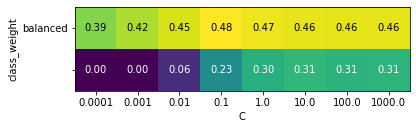

In [103]:
param_grid = {
    "logisticregression__C": np.logspace(-4, 3, 8),
    "logisticregression__class_weight": [None, "balanced"]
}

grid_search = GridSearchCV(
    lr_pipe_balanced, param_grid, cv=5, n_jobs=-1, return_train_score=True, scoring='f1'
)

grid_fit = grid_search.fit(X_train, y_train)

results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(8,2)

# plot the mean cross-validation scores
mglearn.tools.heatmap(
    np.transpose(scores),
    xlabel="C",
    xticklabels=param_grid["logisticregression__C"],
    ylabel="class_weight",
    yticklabels=param_grid["logisticregression__class_weight"],
    cmap="viridis",
)


After using an exhausitve grid search, we can plot a heatmpa of the F1 scores to ensure our hyperparameter range was correct. We can see that larger values of C stop giving better values for the F1 score, so we know the upper range is correct.

The maximum F1 score is **0.48** and occurs for the *class_weights = balanced* case with *C = 0.1*, so these represent our optimized hyperparameters.

<br><br>

### 2.10 Test results
rubric={points:10}

**Your tasks**
1. Evaluate the best model on the test set. In particular show each of the following on the test set:  
    - Confusion matrix. 
    - Classification report. 
    - Precision-recall curve with average precision score.     
    - ROC curve with AUC. 
3. Comment on the results.    

> Note that we are not doing it here but in real life, you would also plot confusion matrix, precision-recall curve, and ROC curve on validation data to examine errors and to choose a threshold which works for your operating point. 

<br><br><br><br>

### Exercise 3: Regression metrics <a name="3"></a>
<hr> 


For this exercise, we'll use [California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) from `sklearn datasets`. The code below loads the dataset.  

In [ ]:
from sklearn.datasets import fetch_california_housing

housing_df = fetch_california_housing(as_frame=True).frame

### 3.1: Data spitting and exploration 
rubric={points:4}

**Your tasks:**

1. Split the data into train (80%) and test (20%) splits. 
2. Explore the train split. Do you need to apply any transformations on the data? If yes, create a preprocessor with the appropriate transformations. 
3. Separate `X` and `y` in train and test splits. 

<br><br>

### 3.2 Baseline: DummyRegressor 
rubric={points:2}

**Your tasks:**
1. Carry out cross-validation using `DummyRegressor` with default scoring. 
2. What metric is used for scoring by default? 

<br><br>

### 3.3 Different regressors
rubric={points:8}

In this exercise, we are going to use [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) model which we haven't looked into yet. At this point you should feel comfortable using models with our usual ML workflow even if you don't know the details. We'll talk about `RandomForestRegressor` later in the course.  

The code below defines a custom scorer called `mape_scorer` and creates dictionaries for different regressors (`models`) and different scoring metrics (`score_types_reg`). 

**Your tasks:**

1. Using the `models` and the evaluation metrics `score_types_reg` in the code below, carry out cross-validation with each model, by passing the evaluation metrics to `scoring` argument of `cross_validate`. Use a pipeline with the model as an estimator if you are applying any transformations. 
2. Show results as a dataframe. 
3. Interpret the results. How do the models compare to the baseline? Which model seems to be performing well with different metrics? 


In [ ]:
def mape(true, pred):
    return 100.0 * np.mean(np.abs((pred - true) / true))


# make a scorer function that we can pass into cross-validation
mape_scorer = make_scorer(mape, greater_is_better=False)

models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(),
}

score_types_reg = {
    "neg_mean_squared_error": "neg_mean_squared_error",
    "neg_root_mean_squared_error": "neg_root_mean_squared_error",
    "neg_mean_absolute_error": "neg_mean_absolute_error",
    "r2": "r2",
    "mape_scorer": mape_scorer,
}

<br><br>

### (Optional) 3.4 Hyperparameter optimization 
rubric={points:1}

**Your tasks:**
1. Carry out hyperparameter optimization using `RandomizedSearchCV` and `Ridge` with the following `param_dist`. The `alpha` hyperparameter of `Ridge` controls the fundamental tradeoff. Choose the metric of your choice for hyperparameter optimization. 
2. Are you getting better scores compared to the default values?

In [ ]:
from scipy.stats import loguniform

param_dist = {"ridge__alpha": loguniform(1e-3, 1e3)}

<br><br>

### 3.5 Test results
rubric={points:4}

**Your tasks:**

1. Try the best model on the test set.
2. Briefly comment on the results. (1 to 2 sentences) 

<br><br>

### 3.6 Model interpretation  
rubric={points:4}

Ridge is a linear model and it learns coefficients associated with each feature during `fit()`. 

**Your tasks:**

1. Visualize coefficients learned by the `Ridge` model above as a pandas dataframe with two columns: features and coefficients. If you attempted 3.4, use the `Ridge` model with best hyperparameters. Otherwise use the `Ridge` model with default hyperparameters. 
2. Increasing which feature values would result in higher housing price? 

<br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 